# RSA Analysis 

** we end up using searchlight RSA **

Comparing BART output with activity in BA10.

In this doc we will only work with pymvpa betas. And go more in depth as to what's driving the correlations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == 'darwin':
    cfg = os.path.join("/Users", "njchiang", "CloudStation", "Grad",
                       "Research", "montilab-ucla", "analogy", "config", "project.json")
    plat = "osx"

elif sys.platform == "linux":
    import platform
    if platform.linux_distribution()[0] == "debian":
        cfg = os.path.join("/home", "njchiang", "data", "CloudStation", "Grad",
                           "Research", "montilab-ucla", "analogy", "config", "project.json")
        plat = "linux"
    else:
        cfg = os.path.join("/u", "project", "monti", "Analysis", "Analogy",
                           "code", "analogy-fmri", "config", "project.json")
        plat = "hoff"
else:
    cfg = os.path.join("D:\\", "CloudStation", "Grad",
                       "Research", "montilab-ucla", "analogy", "config", "project.json")
    plat = "win"

with open(cfg, "r") as f:
    projectSettings = json.load(f)

paths = projectSettings["filepaths"]["{}Paths".format(plat)]
sys.path.append(paths["github"])
sys.path.append(paths["code"])

In [3]:
from fmri.analogy_utils import analysisSettings, contrastSettings, order, \
    pu, pa, pv, compile_models, rsa, save_rois, load_rois


Loading JSON config from /u/project/monti/Analysis/Analogy/code/analogy-fmri/config/analyses.json
Loading JSON config from /u/project/monti/Analysis/Analogy/code/analogy-fmri/config/contrasts.json
Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy-fmri/labels/trialorder_rsa_absorted.csv


## Models

Loading in models from mat files


In [4]:
from fmri.analogy_rsa import  \
downsample_rdms_df_by_factor, create_models, models_to_df, plotmodels\
, roi_rdm, run_rsa_dfs, subject_rdms, plot_results, get_model_rdms, \
reduce_by_factor

In [5]:
# modelnames = ["rel", "humanratings", "w2vdiff", "rstpostprob9", "rstpostprob79", "numchar", "concatword", "typicality"]

modelnames = ["mainrel", "subrel", 
              "rel", "humanratings", "numchar", 
              "w2vdiff", "concatword", 
              "rstpostprob9", "rstpostprob79", 
              ["rstpostprob79", "concatword"] 
#               ["rel", "w2vdiff"], 
#               ["rstpostprob9", "concatword"],
#               ["rstpostprob9", "w2vdiff"]
             ]

# modelnames = ["mainrel", "subrel", "rel", "humanratings"]

raw_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
model_rdms = get_model_rdms(raw_models_df, modelnames)
model_rdms

Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy-fmri/labels/raw_models.csv


,type,name,0,1,2,3,4,5,6,7,...,41318,41319,41320,41321,41322,41323,41324,41325,41326,41327
0,full,mainrel,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,full,subrel,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,full,rel,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
3,full,humanratings,1.110223e-16,3.456765e-04,3.456765e-04,2.766465e-06,2.766465e-06,1.883798e-05,1.883798e-05,3.297221e-05,...,6.416471e-05,6.416471e-05,2.558104e-05,2.558104e-05,0.000000e+00,8.717536e-06,8.717536e-06,8.717536e-06,8.717536e-06,0.000000e+00
4,full,numchar,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
5,full,w2vdiff,2.220446e-16,9.333585e-01,9.333585e-01,9.557922e-01,9.557922e-01,1.064554e+00,1.064554e+00,8.855721e-01,...,1.053615e+00,1.053615e+00,1.055370e+00,1.055370e+00,0.000000e+00,9.636183e-01,9.636183e-01,9.636183e-01,9.636183e-01,0.000000e+00
6,full,concatword,2.220446e-16,9.178494e-01,9.178494e-01,9.101928e-01,9.101928e-01,8.221301e-01,8.221301e-01,9.333544e-01,...,8.809809e-01,8.809809e-01,8.631256e-01,8.631256e-01,0.000000e+00,8.517704e-01,8.517704e-01,8.517704e-01,8.517704e-01,1.110223e-16
7,full,rstpostprob9,0.000000e+00,1.438243e-02,1.438243e-02,1.696986e-01,1.696986e-01,1.129309e-02,1.129309e-02,2.790716e-02,...,2.004162e-01,2.004162e-01,5.986077e-02,5.986077e-02,0.000000e+00,2.267369e-01,2.267369e-01,2.267369e-01,2.267369e-01,0.000000e+00
8,full,rstpostprob79,0.000000e+00,1.420752e-01,1.420752e-01,2.476321e-01,2.476321e-01,1.672532e-01,1.672532e-01,1.220956e-01,...,3.427279e-01,3.427279e-01,1.810736e-01,1.810736e-01,0.000000e+00,4.030399e-01,4.030399e-01,4.030399e-01,4.030399e-01,0.000000e+00
9,full,'rstpostprob79'+'concatword',1.110223e-16,5.649513e-01,5.649513e-01,6.353464e-01,6.353464e-01,5.252475e-01,5.252475e-01,5.725416e-01,...,7.545284e-01,7.545284e-01,5.682479e-01,5.682479e-01,2.220446e-16,7.349043e-01,7.349043e-01,7.349043e-01,7.349043e-01,1.110223e-16


Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy-fmri/labels/raw_models.csv


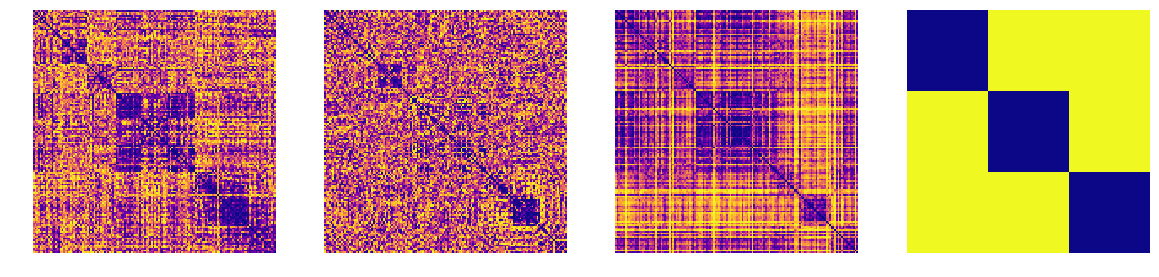

In [6]:
# model_figure
# plotmodels_old(models, save=False)

modelnames = ["concatword", "w2vdiff", "rstpostprob79", "mainrel"]

raw_vis_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
vis_model_rdms = get_model_rdms(raw_vis_models_df, modelnames)



f = plt.figure(figsize=(20,10))
axarr = f.subplots(1, len(vis_model_rdms.name.unique()))
rdms = vis_model_rdms[vis_model_rdms.type == "avg"]
for j, m in enumerate(vis_model_rdms.name.unique()):
    pv.plot_rdm(rdms[rdms.name==m].iloc[:, 2:].dropna(axis=1),
           ax=axarr[j], cb=False, cmap="plasma")
#     axarr[j].set_title(m)
    axarr[j].set_axis_off()
    
# f.savefig(os.path.join(paths["cloud"], "Figures", "rsa-models.png"))

In [7]:
masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
masks_dict["rlpfc-hobeika"] = "anat-left-rlpfc-hobeika2016"
masks_dict["rlpfc-power"] = "anat-left-rlpfc-power2011"
masks_dict["dlpfc-power"] = "anat-left-dlpfc-power2011"
masks_dict["vlpfc-power"] = "anat-left-vlpfc-power2011"
masks_dict["spl-power"] = "anat-left-spl-power2011"
masks_dict["ipl-power"] = "anat-left-ipl-power2011"
masks_dict["parietal"] = "juelich-left-SPL-7A+IPS_mask"
masks_dict["spl_d"] = "mars-left-SPLd_mask"
masks_dict["spl_e"] = "mars-left-SPLe_mask"
masks_dict["ipl_d"] = "mars-left-IPLd_mask"
masks_dict["ipl_e"] = "mars-left-IPLe_mask"


masks_dict

{'BA10m': 'dfc-left-ba10_mask',
 'BA10l': 'neubert-left-FPl-dil2-handmasked_mask',
 'BA44': 'harvardoxford-thr25-left-ba44_mask',
 'BA9': 'dfc-left-ba9_mask',
 'BA45': 'harvardoxford-thr25-left-ba45_mask',
 'BA46': 'dfc-mod-left-ba46_mask',
 'BA47': 'neubert-mod-left-ba47_mask',
 'lpstg': 'harvardoxford-thr25-left-pSTG_mask',
 'laitg': 'harvardoxford-thr25-left-aITG_mask',
 'lpmtg': 'harvardoxford-thr25-left-pMTG_mask',
 'ltp': 'harvardoxford-thr25-left-temporalpole_mask',
 'ltomtg': 'harvardoxford-thr25-left-toMTG_mask',
 'lastg': 'harvardoxford-thr25-left-aSTG_mask',
 'lspl': 'juelich-left-SPL-7A_mask',
 'lips': 'juelich-left-IPS_mask',
 'psmg': 'juelich-left-IPL-PFm_mask',
 'lag': 'juelich-left-IPL-Pga_mask',
 'v1': 'aal-v1_mask',
 'csf': 'csf-bin_mask',
 'rlpfc-hobeika': 'anat-left-rlpfc-hobeika2016',
 'rlpfc-power': 'anat-left-rlpfc-power2011',
 'dlpfc-power': 'anat-left-dlpfc-power2011',
 'vlpfc-power': 'anat-left-vlpfc-power2011',
 'spl-power': 'anat-left-spl-power2011',
 'ipl-p

## Loading betas

In [8]:
# top 80% only...

# masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
# b = "cope-LSS"
# b = "cope-LSS-condensed"
# b = "tstat-subrel"
# b = "LSS-condensed"
# b = "tstat-LSS"
# b = "LSA"
# b = "pymvpa"

# metric="correlation"
metric="correlation"
rois, labels = load_rois(b)
rois_trunc = {}
for s in projectSettings["subjects"]:
    rois_trunc[s] = {}
    for m in masks_dict:
        activations = np.abs(rois[s][m][labels[s]["AB"] == 1]).mean(0)
        indices = np.argsort(activations)
        rois_trunc[s][m] = rois[s][m][:, indices[indices > int(0.2 * len(activations))]]


trunc_rdms = subject_rdms(rois_trunc, labels, masks_dict, metric=metric, b=b)

    
# Relationship between ROIs:
# f = plt.figure()
# ax = f.gca()
# grouped = trunc_rdms.groupby(["betatype", "roi"]).mean().T
# pv.plot_rdm(grouped.corr(method="spearman"),
#             ax=ax, mode="corr", cb=True, cmap="bwr", scale=False, rank=False, vmin=-1, vmax=1)
# ax.set_title(b)
# roi_names = grouped.head().columns.get_level_values(1)
# ax.set_xticks(range(len(roi_names)))
# ax.set_yticks(range(len(roi_names)))
# ax.set_yticklabels(roi_names)
# ax.set_xticklabels(roi_names, rotation=75)


Loading sub-01 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/rois/sub-01_cope-LSS_labels.csv
Loading sub-02 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-02/rois/sub-02_cope-LSS_labels.csv
Loading sub-03 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-03/rois/sub-03_cope-LSS_labels.csv
Loading sub-04 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-04/rois/sub-04_cope-LSS_labels.csv
Loading sub-05 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-05/rois/sub-05_cope-LSS_labels.csv
Loading sub-06 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-06/rois/sub-06_cope-LSS_labels.csv
Loading sub-07 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-07/rois/sub-07_cope-LSS_labels.csv
Loading sub-08 betas
Loading label file from: /u/project/monti/Analysis/Analogy/der

In [10]:
rois["sub-01"]["spl-power"].shape, rois_trunc["sub-01"]["spl-power"].shape

((864, 111), (864, 88))

In [11]:
import scipy as sp
sp.io.savemat("/u/home/n/njchiang/transfer/RDMs/trunc_rdms.mat", {"all_RDMs": trunc_rdms.iloc[:, 3:].values, "meta": trunc_rdms.iloc[:, 0:3].values})

Loading sub-01 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/rois/sub-01_cope-LSS_labels.csv
Loading sub-02 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-02/rois/sub-02_cope-LSS_labels.csv
Loading sub-03 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-03/rois/sub-03_cope-LSS_labels.csv
Loading sub-04 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-04/rois/sub-04_cope-LSS_labels.csv
Loading sub-05 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-05/rois/sub-05_cope-LSS_labels.csv
Loading sub-06 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-06/rois/sub-06_cope-LSS_labels.csv
Loading sub-07 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-07/rois/sub-07_cope-LSS_labels.csv
Loading sub-08 betas
Loading label file from: /u/project/monti/Analysis/Analogy/der

[Text(0, 0, 'BA10l'),
 Text(0, 0, 'BA10m'),
 Text(0, 0, 'BA44'),
 Text(0, 0, 'BA45'),
 Text(0, 0, 'BA46'),
 Text(0, 0, 'BA47'),
 Text(0, 0, 'BA9'),
 Text(0, 0, 'csf'),
 Text(0, 0, 'dlpfc-power'),
 Text(0, 0, 'ipl-power'),
 Text(0, 0, 'ipl_d'),
 Text(0, 0, 'ipl_e'),
 Text(0, 0, 'lag'),
 Text(0, 0, 'laitg'),
 Text(0, 0, 'lastg'),
 Text(0, 0, 'lips'),
 Text(0, 0, 'lpmtg'),
 Text(0, 0, 'lpstg'),
 Text(0, 0, 'lspl'),
 Text(0, 0, 'ltomtg'),
 Text(0, 0, 'ltp'),
 Text(0, 0, 'parietal'),
 Text(0, 0, 'psmg'),
 Text(0, 0, 'rlpfc-hobeika'),
 Text(0, 0, 'rlpfc-power'),
 Text(0, 0, 'spl-power'),
 Text(0, 0, 'spl_d'),
 Text(0, 0, 'spl_e'),
 Text(0, 0, 'v1'),
 Text(0, 0, 'vlpfc-power')]

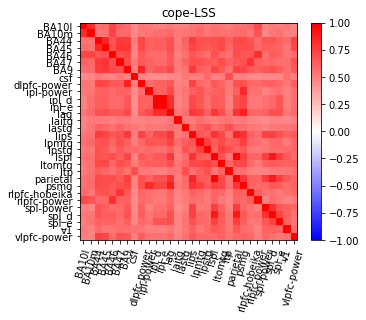

In [8]:
# masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
# b = "cope-LSS"
# b = "cope-LSS-condensed"
# b = "tstat-subrel"
# b = "LSS-condensed"
# b = "tstat-LSS"
# b = "LSA"
# b = "pymvpa"

# metric="correlation"
metric="correlation"
try: 
    rois, labels = load_rois(b)
    full_rdms = subject_rdms(rois, labels, masks_dict, metric=metric, b=b)
except (FileNotFoundError, KeyError):
    save_rois(masks_dict, b)
    rois, labels = load_rois(b)
    full_rdms = subject_rdms(rois, labels, masks_dict, metric=metric, b=b)

    
# Relationship between ROIs:
f = plt.figure()
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, mode="corr", cb=True, cmap="bwr", scale=False, rank=False, vmin=-1, vmax=1)
ax.set_title(b)
roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)


In [9]:
full_rdms.iloc[:, 0:3].to_csv("~/transfer/RDMs/rdms_meta.csv")  

In [11]:
t = sp.io.loadmat("/u/home/n/njchiang/transfer/RDMs/rdms.mat")
t["all_RDMs"]

array([[0.93473304, 0.95873854, 0.84424739, ..., 0.77008435, 0.67462374,
        0.30968742],
       [1.07835002, 0.70624252, 0.63173532, ..., 0.63031781, 0.62415171,
        0.36906221],
       [0.91828892, 1.06117642, 0.78749323, ..., 0.62880266, 0.65459737,
        0.30228901],
       ...,
       [0.96847591, 1.2933895 , 1.09754556, ..., 0.77135888, 0.6528574 ,
        0.57736875],
       [0.68039517, 1.23558126, 1.15229933, ..., 0.58909404, 0.62947965,
        0.4497457 ],
       [0.68039517, 1.23558126, 1.15229933, ..., 0.58909404, 0.62947965,
        0.4497457 ]])

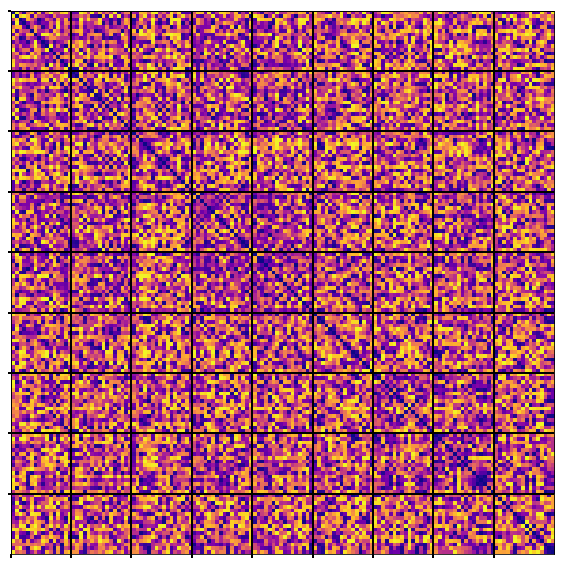

In [10]:
# visualize models
# plotmodels_old(models, save=False)
# f = plt.figure(figsize=(20,10))
# axarr = f.subplots(1, len(model_rdms.name.unique()))
ticks = np.arange(0, 144, 16) - 0.5

f = plt.figure(figsize=(10, 10))
ax = f.gca()
rdms = full_rdms
for m in masks_dict:
    pv.plot_rdm(rdms.groupby(["betatype", "roi"]).mean().loc[b, m], ax=ax, cmap="plasma", cb=False)
    # ax.set_title(m)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(which="major", color="black", linestyle="-", linewidth=2)

    f.savefig(os.path.join(paths["cloud"], "analysis", "rsa", "Figures", "rdms", "{}-{}-rdm.png".format(b, m)))

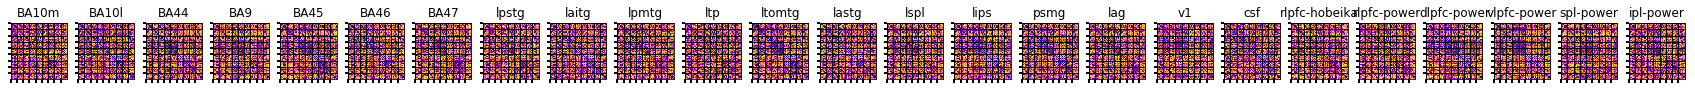

In [11]:
# visualize models
# plotmodels_old(models, save=False)
# f = plt.figure(figsize=(20,10))
# axarr = f.subplots(1, len(model_rdms.name.unique()))
ticks = np.arange(0, 144, 16) - 0.5

f, axarr = plt.subplots(1,len(masks_dict), figsize=(30, 10))
rdms = full_rdms
for i, m in enumerate(masks_dict):
    pv.plot_rdm(rdms.groupby(["betatype", "roi"]).mean().loc[b, m], ax=axarr[i], cmap="plasma", cb=False)
    axarr[i].set_title(m)
    axarr[i].xaxis.set_major_formatter(plt.NullFormatter())
    axarr[i].yaxis.set_major_formatter(plt.NullFormatter())
    axarr[i].xaxis.set_tick_params(width=2)
    axarr[i].yaxis.set_tick_params(width=2)
    axarr[i].set_xticks(ticks)
    axarr[i].set_yticks(ticks)
    axarr[i].grid(which="major", color="black", linestyle="-", linewidth=1)
    
# f.savefig(os.path.join(paths["cloud"], "Figures", "{}-avg-rdms.png".format(b)))

In [52]:
1 - rsa.pdist(full_rdms[full_rdms.roi==m].iloc[:, 3:].values, metric="correlation").mean()

0.10605091481344009

In [12]:
upper_bounds = {}
for m in masks_dict:
    upper_bounds[m] = 1 - rsa.pdist(full_rdms[full_rdms.roi==m].iloc[:, 3:].values, metric="correlation").mean()
upper_bounds

{'BA10m': 0.22290225271554565,
 'BA10l': 0.18363539598810996,
 'BA44': 0.22996669152059146,
 'BA9': 0.22594767342413136,
 'BA45': 0.2730261943964686,
 'BA46': 0.2161673058929765,
 'BA47': 0.3353489375403186,
 'lpstg': 0.36841576017609134,
 'laitg': 0.6247317740746683,
 'lpmtg': 0.43504969014640216,
 'ltp': 0.4749755326402604,
 'ltomtg': 0.2755151386956931,
 'lastg': 0.38109393576842854,
 'lspl': 0.12108681735909055,
 'lips': 0.2144584010874706,
 'psmg': 0.13062000190498324,
 'lag': 0.10362997972569843,
 'v1': 0.30144342643333266,
 'csf': 0.33144409749673054,
 'rlpfc-hobeika': 0.13208056330811857,
 'rlpfc-power': 0.16374259417928594,
 'dlpfc-power': 0.1845279600373806,
 'vlpfc-power': 0.272075467300396,
 'spl-power': 0.11509492987768388,
 'ipl-power': 0.10605091481344009,
 'parietal': 0.14462426196572065,
 'spl_d': 0.10289037659384304,
 'spl_e': 0.12227336891509444,
 'ipl_d': 0.09897915573754168,
 'ipl_e': 0.09897915573754168}

In [13]:
np.corrcoef(full_rdms[full_rdms.roi==m].iloc[:, 3:].values).shape

(16, 16)

In [14]:
model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman")

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.489246,0.982963,0.974214,0.051285,0.050389,0.221322,0.220108,0.195405,0.191461
1,0.489246,1.000000,0.641214,0.635507,0.035819,0.103958,0.249122,0.260488,0.201843,0.211134
2,0.982963,0.641214,1.000000,0.991100,0.052672,0.066244,0.247234,0.248561,0.214466,0.212954
3,0.974214,0.635507,0.991100,1.000000,0.049088,0.068243,0.238414,0.243837,0.214465,0.211266
4,0.051285,0.035819,0.052672,0.049088,1.000000,-0.000497,0.070041,0.079512,0.090495,0.083497
5,0.050389,0.103958,0.066244,0.068243,-0.000497,1.000000,0.336426,0.138673,0.197862,0.231454
6,0.221322,0.249122,0.247234,0.238414,0.070041,0.336426,1.000000,0.149256,0.139573,0.488196
7,0.220108,0.260488,0.248561,0.243837,0.079512,0.138673,0.149256,1.000000,0.859387,0.783162
8,0.195405,0.201843,0.214466,0.214465,0.090495,0.197862,0.139573,0.859387,1.000000,0.816724
9,0.191461,0.211134,0.212954,0.211266,0.083497,0.231454,0.488196,0.783162,0.816724,1.000000


## Visualization

[Text(0, 0, 'mainrel'),
 Text(0, 0, 'subrel'),
 Text(0, 0, 'rel'),
 Text(0, 0, 'humanratings'),
 Text(0, 0, 'numchar'),
 Text(0, 0, 'w2vdiff'),
 Text(0, 0, 'concatword'),
 Text(0, 0, 'rstpostprob9'),
 Text(0, 0, 'rstpostprob79'),
 Text(0, 0, "['rstpostprob79', 'concatword']")]

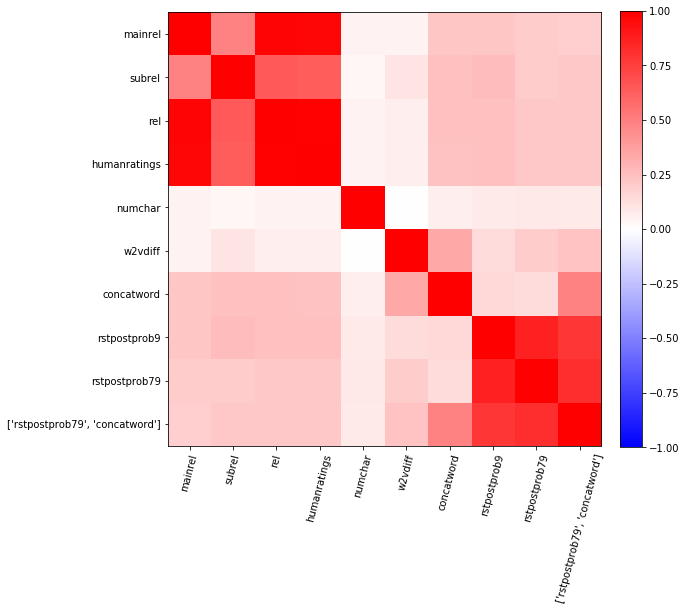

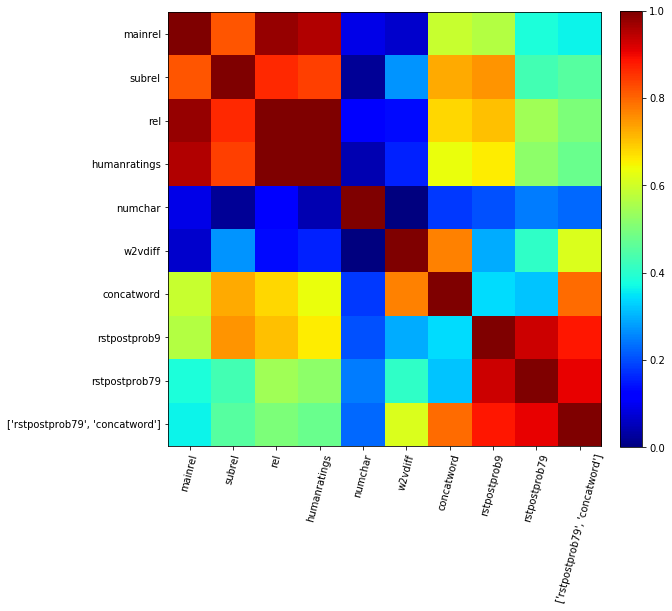

In [30]:
# Relationship between the models
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
# f, axarr = plt.subplots(1,3, figsize=(11, 8.5))
im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
            ax=ax, cb=False, cmap="bwr", mode="corr",
                 scale=False, rank=False, vmin=-1, vmax=1)
f.colorbar(im, fraction=0.046, pad=0.04)
ax.set_xticks(range(len(modelnames)))
ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames)
ax.set_xticklabels(modelnames, rotation=75)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman.png"))

f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
            ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
f.colorbar(im, fraction=0.046, pad=0.04)

ax.set_xticks(range(len(modelnames)))
ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames)
ax.set_xticklabels(modelnames, rotation=75)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman-ranked.png"))

# axarr[2].set_xticks(range(len(modelnames)))
# axarr[2].set_yticks(range(len(modelnames)))
# axarr[2].set_yticklabels(modelnames)
# axarr[2].set_xticklabels(modelnames, rotation=75)

[Text(0, 0, 'BA10l'),
 Text(0, 0, 'BA10m'),
 Text(0, 0, 'BA44'),
 Text(0, 0, 'BA45'),
 Text(0, 0, 'BA46'),
 Text(0, 0, 'BA47'),
 Text(0, 0, 'BA9'),
 Text(0, 0, 'csf'),
 Text(0, 0, 'dlpfc-power'),
 Text(0, 0, 'ipl-power'),
 Text(0, 0, 'ipl_d'),
 Text(0, 0, 'ipl_e'),
 Text(0, 0, 'lag'),
 Text(0, 0, 'laitg'),
 Text(0, 0, 'lastg'),
 Text(0, 0, 'lips'),
 Text(0, 0, 'lpmtg'),
 Text(0, 0, 'lpstg'),
 Text(0, 0, 'lspl'),
 Text(0, 0, 'ltomtg'),
 Text(0, 0, 'ltp'),
 Text(0, 0, 'parietal'),
 Text(0, 0, 'psmg'),
 Text(0, 0, 'rlpfc-hobeika'),
 Text(0, 0, 'rlpfc-power'),
 Text(0, 0, 'spl-power'),
 Text(0, 0, 'spl_d'),
 Text(0, 0, 'spl_e'),
 Text(0, 0, 'v1'),
 Text(0, 0, 'vlpfc-power')]

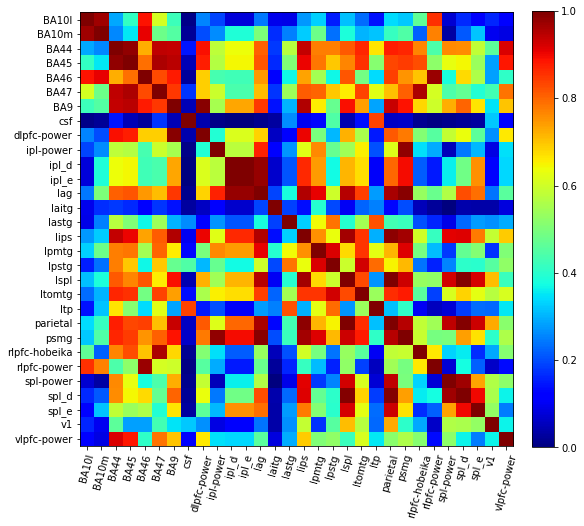

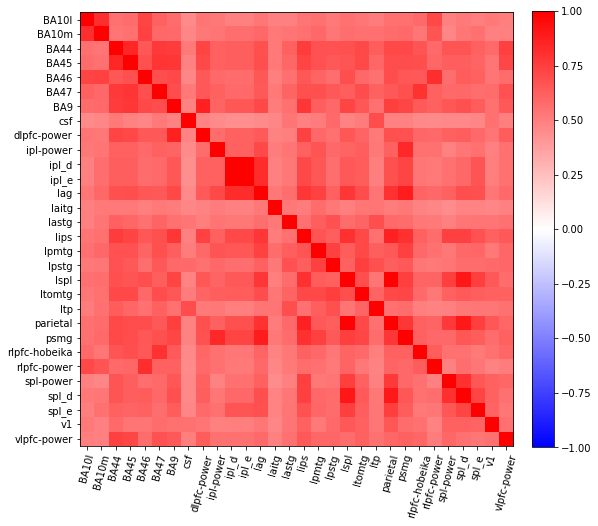

In [15]:
# Relationship between ROIs:
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
im = pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
# ax.set_title(b)
f.colorbar(im, fraction=0.046, pad=0.04)

roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)
# corr_rdms[corr_rdms.betatype==b]
# corr_rdms.groupby(["betatype", "roi"]).mean().T.corr()
# f.savefig(os.path.join(paths["cloud"], "Figures", "{}-roi-corrs-spearman-ranked.png".format(b)))


# Relationship between ROIs:
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
im = pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, cb=True, cmap="bwr", mode="corr", scale=False, rank=False, vmin=-1, vmax=1)
# ax.set_title(b)

roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)
# corr_rdms[corr_rdms.betatype==b]
# corr_rdms.groupby(["betatype", "roi"]).mean().T.corr()
# f.savefig(os.path.join(paths["cloud"], "Figures", "{}-roi-corrs-spearman.png".format(b)))


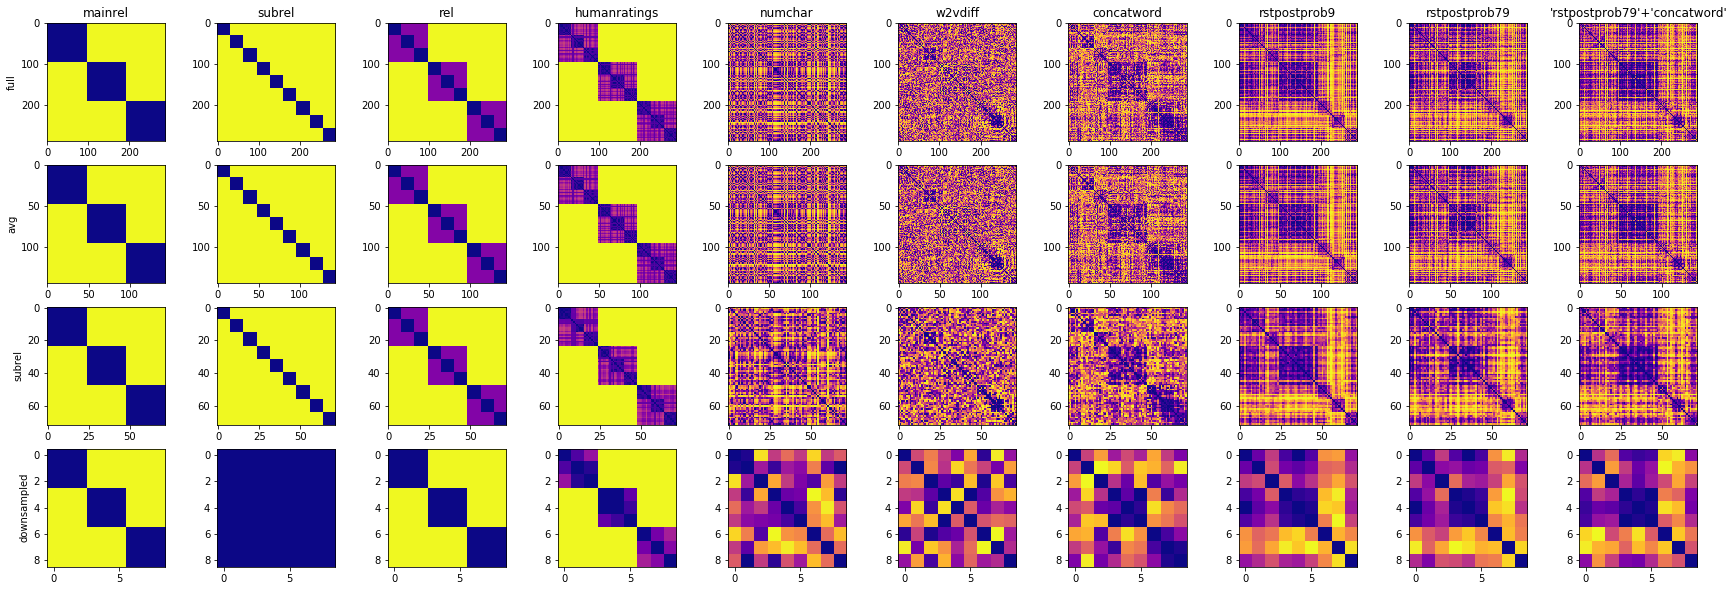

In [14]:
plotmodels(model_rdms, save=False)

## ROI Analysis
- Directly running spearman correlation between RDMs and model



In [29]:
model_rdms[(model_rdms.name == "rstpostprob79") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].head()

,0,1,2,3,4,5,6,7,8,9,...,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295
8,0.142075,0.247632,0.167253,0.122096,0.10059,0.28847,0.1638,0.126485,0.148013,0.103672,...,0.20357,0.168768,0.377484,0.159219,0.172097,0.442719,0.155832,0.342728,0.181074,0.40304


In [30]:
full_rdms.iloc[0, 3:].values

array([0.9347330424795123, 0.958738541108845, 0.8442473890413404, ...,
       0.7700843515979476, 0.6746237353076691, 0.3096874185721424],
      dtype=object)

In [31]:
# partial correlation analysis:
#1. partial out W2V, see if BART correlates
#2. reverse.
import statsmodels.api as sm
model = sm.OLS(full_rdms.iloc[0:1, 3:].values.T, 
       model_rdms[(model_rdms.name == "rstpostprob79") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].values.T)
res = model.fit()
res.summary()
r = sm.OLS(full_rdms.iloc[0:1, 3:].values.T, 
       model_rdms[(model_rdms.name == "rstpostprob79") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].values.T).fit().resid

In [32]:
r = ([sm.OLS(full_rdms.iloc[i:i+1, 3:].values.T, 
       model_rdms[(model_rdms.name == "rstpostprob79") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].values.T).fit().resid
      for i in range(len(full_rdms))])

In [33]:
np.array(r).shape

(400, 10296)

In [35]:
bart_resids = np.array([sm.OLS(full_rdms.iloc[i:i+1, 3:].values.T, 
       model_rdms[(model_rdms.name == "rstpostprob79") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].values.T).fit().resid
      for i in range(len(full_rdms))])
w2v_resids = np.array([sm.OLS(full_rdms.iloc[i:i+1, 3:].values.T, 
       model_rdms[(model_rdms.name == "concatword") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].values.T).fit().resid
      for i in range(len(full_rdms))])
baseline_resids = np.array([sm.OLS(full_rdms.iloc[i:i+1, 3:].values.T, 
       model_rdms[(model_rdms.name == "mainrel") & (model_rdms.type == "avg")].dropna(axis=1).iloc[:, 2:].values.T).fit().resid
      for i in range(len(full_rdms))])
res.resid.shape

(10296,)

In [36]:
pd.DataFrame(bart_resids).head()

,0,1,2,3,4,5,6,7,8,9,...,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295
0,0.568538,0.320473,0.413157,0.625558,0.799656,-0.008619,0.289545,0.762946,0.538376,0.651278,...,0.423073,0.525742,0.187061,0.776972,0.533022,-0.164880,0.534513,-0.113288,0.207911,-0.729138
1,0.688823,0.027310,0.173177,0.598887,0.729466,-0.169775,0.309801,0.767516,0.769678,0.799299,...,0.506359,0.742913,0.269799,0.773485,0.643532,-0.191539,0.674138,-0.309339,0.127703,-0.735952
2,0.544401,0.409502,0.347346,0.669084,0.623538,-0.187411,0.526093,0.714439,0.564461,0.636585,...,0.308252,0.588690,-0.049090,0.556516,0.505339,-0.232842,0.539245,-0.273128,0.178080,-0.758360
3,0.354003,0.217812,0.296669,0.661645,0.606428,-0.183550,0.416430,0.654384,0.491884,0.599120,...,0.340087,0.612995,0.193348,0.782581,0.515775,-0.123180,0.618537,-0.223074,0.140024,-0.777753
4,0.456018,0.354640,0.258362,0.701842,0.674729,-0.197497,0.453539,0.784876,0.528308,0.589801,...,0.387343,0.480604,0.055143,0.580113,0.498382,-0.209930,0.519976,-0.215981,0.188998,-0.752652


In [37]:
bart_resid_rdms = pd.concat([full_rdms.iloc[:, :3], pd.DataFrame(bart_resids)], axis=1)
w2v_resid_rdms = pd.concat([full_rdms.iloc[:, :3], pd.DataFrame(w2v_resids)], axis=1)
baseline_resid_rdms = pd.concat([full_rdms.iloc[:, :3], pd.DataFrame(baseline_resids)], axis=1)

In [38]:
bart_resid_with_w2v = run_rsa_dfs(bart_resid_rdms, model_rdms[(model_rdms.type=="avg") & (model_rdms.name == "concatword")].dropna(axis=1))
w2v_resid_with_bart = run_rsa_dfs(w2v_resid_rdms, model_rdms[(model_rdms.type=="avg") & (model_rdms.name == "rstpostprob79")].dropna(axis=1))
baseline_resid_with_bart = run_rsa_dfs(baseline_resid_rdms, model_rdms[(model_rdms.type=="avg") & (model_rdms.name == "rstpostprob79")].dropna(axis=1))

In [39]:
baseline_resid_with_bart.groupby("roi").std()/np.sqrt(15)

,rstpostprob79,upper,lower
roi,,,
BA10l,0.004107,0.004642,0.007825
BA10m,0.003938,0.004575,0.007252
BA44,0.005237,0.003536,0.006263
BA45,0.004379,0.003006,0.005612
BA46,0.003332,0.003626,0.005880
BA47,0.004394,0.002708,0.003760
BA9,0.005776,0.003419,0.006612
csf,0.002135,0.003937,0.009723
dlpfc-power,0.004821,0.002887,0.006071


In [27]:
bart_resid_with_w2v.groupby("roi").std()/np.sqrt(15)

,concatword,upper,lower
roi,,,
BA10l,0.003731,0.017331,0.019784
BA10m,0.003573,0.015464,0.017493
BA44,0.003065,0.010570,0.011933
BA45,0.002977,0.009129,0.010441
BA46,0.003187,0.011153,0.012717
BA47,0.001708,0.004359,0.004953
BA9,0.004155,0.011644,0.013231
csf,0.002761,0.018922,0.021956
dlpfc-power,0.004961,0.014687,0.016684


In [9]:
# b = "cope-LSS"
try:
    corr_df = pd.read_csv(os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_{}.csv".format(b)))
#     corr_ds_df = pd.read_csv(os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_ds.csv"))

except FileNotFoundError:
    analysis = []
    corr_df = run_rsa_dfs(full_rdms, model_rdms[model_rdms.type=="avg"].dropna(axis=1))
    analysis += ["full" for _ in range(len(corr_df))]

    corr_df.to_csv(
        os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_{}.csv".format(b)),
        index=False
    )

In [12]:
analysis = []
corr_df = run_rsa_dfs(trunc_rdms, model_rdms[model_rdms.type=="avg"].dropna(axis=1))
analysis += ["full" for _ in range(len(corr_df))]

corr_df.to_csv(
    os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_trunc-20_{}.csv".format(b)),
    index=False
)

In [17]:
corrgp = corr_df.groupby(["betatype", "roi"])
corrgp.mean()

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                                   
cope-LSS BA10l          0.005556 -0.004912  0.003854      0.002970 -0.006820   
         BA10m          0.006550 -0.003379  0.005051      0.004095 -0.015055   
         BA44           0.022157  0.012431  0.022115      0.022018  0.001697   
         BA45           0.023159  0.011106  0.022717      0.022148 -0.005631   
         BA46           0.007002 -0.003676  0.005386      0.004996 -0.015277   
         BA47           0.017338  0.007898  0.016920      0.017320 -0.003170   
         BA9            0.011743 -0.000192  0.010292      0.010685 -0.011456   
         csf            0.000930 -0.013744 -0.002078     -0.002572 -0.000904   
         dlpfc-power    0.013421 -0.000168  0.011773      0.011431 -0.007465   
         ipl-power      0.010994  0.003568  0.010425      0.010167 -0.007345   
         ipl_d          0.013655  0.005521  0.013178      0.012986 -0.011491   
         ipl_e          0.013655  0.005521  0.013178      0.012986 -0.011491   
         lag            0.018918  0.009725  0.018694      0.018584 -0.007509   
         laitg          0.001585 -0.016518 -0.002086     -0.002489 -0.012293   
         lastg          0.003648 -0.005637  0.002021      0.001089 -0.002035   
         lips           0.013779  0.003295  0.012818      0.013246 -0.003636   
         lpmtg          0.010703 -0.001058  0.009194      0.009002 -0.008316   
         lpstg          0.018909  0.004691  0.017626      0.016702 -0.004416   
         lspl           0.012186  0.004449  0.011659      0.011522  0.002410   
         ltomtg         0.030170  0.017811  0.030299      0.029532  0.000799   
         ltp            0.005925 -0.006291  0.003887      0.003229 -0.004086   
         parietal       0.012485  0.004350  0.011902      0.011867  0.001509   
         psmg           0.014385  0.005337  0.013781      0.013846 -0.008256   
         rlpfc-hobeika  0.005281 -0.000914  0.004454      0.005025  0.002901   
         rlpfc-power    0.001358 -0.008436 -0.000583     -0.001333 -0.017097   
         spl-power      0.012472  0.006892  0.012426      0.012458  0.015403   
         spl_d          0.010768  0.003827  0.010281      0.009866  0.006478   
         spl_e          0.008277  0.000127  0.007310      0.007151 -0.001236   
         v1             0.006706 -0.004249  0.005005      0.004055  0.045688   
         vlpfc-power    0.017823  0.004447  0.016619      0.016948  0.005260   

                         w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                                
cope-LSS BA10l          0.002899   -0.001581      0.004197      -0.001994   
         BA10m         -0.001125   -0.003870      0.004016      -0.001007   
         BA44           0.008296    0.012053      0.016587       0.014327   
         BA45           0.007580    0.015500      0.017271       0.015063   
         BA46          -0.000426    0.000113      0.009044       0.004000   
         BA47           0.004463    0.003482      0.009997       0.013321   
         BA9            0.005814    0.005469      0.021466       0.019208   
         csf           -0.000616   -0.008512      0.002224       0.000598   
         dlpfc-power    0.005233    0.004885      0.020054       0.016081   
         ipl-power      0.007105    0.007177      0.006607       0.006582   
         ipl_d          0.006965    0.002850      0.007657       0.006751   
         ipl_e          0.006965    0.002850      0.007657       0.006751   
         lag            0.004189    0.009140      0.013205       0.012531   
         laitg          0.003582   -0.004810      0.000522       0.000144   
         lastg          0.003013   -0.000565     -0.002470      -0.002031   
         lips           0.004760    0.005650      0.026543       0.026837   
         lpmtg          0.004863    0.000177      0.004631       0.004905   
 

In [18]:
corrgp.std()/np.sqrt(15)

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                                   
cope-LSS BA10l          0.002926  0.001871  0.002820      0.002823  0.006243   
         BA10m          0.002530  0.002010  0.002485      0.002618  0.006416   
         BA44           0.004091  0.003831  0.004190      0.004253  0.005563   
         BA45           0.004281  0.004094  0.004306      0.004310  0.004834   
         BA46           0.003460  0.002603  0.003414      0.003531  0.005785   
         BA47           0.003868  0.004432  0.004151      0.004306  0.006939   
         BA9            0.002900  0.002794  0.002925      0.002688  0.004933   
         csf            0.002369  0.002208  0.002238      0.002178  0.003502   
         dlpfc-power    0.003401  0.003009  0.003430      0.003393  0.007090   
         ipl-power      0.002888  0.002634  0.002817      0.002841  0.005526   
         ipl_d          0.002794  0.002172  0.002710      0.002610  0.005184   
         ipl_e          0.002794  0.002172  0.002710      0.002610  0.005184   
         lag            0.003652  0.002532  0.003514      0.003552  0.005436   
         laitg          0.001974  0.001834  0.001985      0.002126  0.003213   
         lastg          0.002691  0.002543  0.002697      0.002709  0.003940   
         lips           0.003058  0.002595  0.003090      0.003014  0.005759   
         lpmtg          0.002512  0.002522  0.002616      0.002473  0.004230   
         lpstg          0.004771  0.003159  0.004723      0.004642  0.003758   
         lspl           0.002890  0.002804  0.002877      0.002923  0.006469   
         ltomtg         0.006238  0.005371  0.006471      0.006346  0.005821   
         ltp            0.002724  0.002549  0.002693      0.002712  0.004046   
         parietal       0.002968  0.002720  0.002936      0.002984  0.006411   
         psmg           0.002782  0.002022  0.002656      0.002749  0.004932   
         rlpfc-hobeika  0.002959  0.002062  0.002918      0.002890  0.009158   
         rlpfc-power    0.002922  0.002559  0.002968      0.002949  0.004042   
         spl-power      0.002644  0.002965  0.002762      0.002769  0.007608   
         spl_d          0.002555  0.002903  0.002538      0.002385  0.007852   
         spl_e          0.002063  0.001430  0.001795      0.001892  0.005188   
         v1             0.001505  0.001281  0.001445      0.001584  0.010192   
         vlpfc-power    0.004287  0.004073  0.004473      0.004679  0.004794   

                         w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                                
cope-LSS BA10l          0.001336    0.002990      0.007393       0.007330   
         BA10m          0.001770    0.002973      0.007864       0.007147   
         BA44           0.002105    0.004786      0.011373       0.009718   
         BA45           0.002381    0.004486      0.008508       0.007860   
         BA46           0.002186    0.004920      0.005228       0.005589   
         BA47           0.002950    0.004272      0.008065       0.008032   
         BA9            0.001683    0.005110      0.011692       0.010558   
         csf            0.001899    0.002210      0.004211       0.003869   
         dlpfc-power    0.002604    0.005361      0.009686       0.008571   
         ipl-power      0.002173    0.003368      0.006845       0.006652   
         ipl_d          0.003117    0.004874      0.008671       0.007156   
         ipl_e          0.003117    0.004874      0.008671       0.007156   
         lag            0.001889    0.004298      0.006654       0.006220   
         laitg          0.001954    0.003063      0.004045       0.003412   
         lastg          0.002529    0.003123      0.006030       0.004991   
         lips           0.001175    0.005481      0.010321       0.009187   
         lpmtg          0.002424    0.004061      0.007015       0.006092   
 

In [13]:
corrgp = corr_df.groupby(["betatype", "roi"])

corrgp.mean() - 2.3 * corrgp.std()/np.sqrt(15)

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                                   
cope-LSS BA10l         -0.001029 -0.009435 -0.002585     -0.003458 -0.020525   
         BA10m          0.000030 -0.008191 -0.001312     -0.002808 -0.027679   
         BA44           0.012500  0.003091  0.012138      0.012004 -0.010468   
         BA45           0.013185  0.002191  0.012743      0.012110 -0.016699   
         BA46          -0.002509 -0.009992 -0.003837     -0.004538 -0.027870   
         BA47           0.008008 -0.001840  0.007053      0.007094 -0.019522   
         BA9            0.004967 -0.006075  0.003616      0.004619 -0.022614   
         csf           -0.005737 -0.018395 -0.008068     -0.008488 -0.009177   
         dlpfc-power    0.004444 -0.007056  0.002817      0.002797 -0.025733   
         ipl-power      0.004605 -0.003780  0.003977      0.003510 -0.020603   
         ipl_d          0.006458  0.000039  0.006151      0.006148 -0.024045   
         ipl_e          0.006458  0.000039  0.006151      0.006148 -0.024045   
         lag            0.009263  0.001938  0.009113      0.008965 -0.020524   
         laitg         -0.002018 -0.020065 -0.005696     -0.006149 -0.019815   
         lastg         -0.002847 -0.011150 -0.004370     -0.005137 -0.011179   
         lips           0.005641 -0.004185  0.004385      0.004732 -0.019117   
         lpmtg          0.002282 -0.008688  0.000585      0.000929 -0.019354   
         lpstg          0.006573 -0.003216  0.005434      0.004625 -0.012991   
         lspl           0.004799 -0.001560  0.004339      0.003989 -0.012983   
         ltomtg         0.015763  0.006238  0.015499      0.014888 -0.012828   
         ltp            0.000064 -0.011653 -0.001883     -0.002575 -0.013667   
         parietal       0.004915 -0.001153  0.004496      0.004360 -0.014671   
         psmg           0.008484  0.000174  0.008076      0.007738 -0.018398   
         rlpfc-hobeika -0.001161 -0.005291 -0.001768     -0.001356 -0.018186   
         rlpfc-power   -0.004680 -0.013419 -0.006572     -0.007266 -0.024125   
         spl-power      0.005353  0.000535  0.005224      0.005249 -0.001640   
         spl_d          0.006188 -0.001700  0.005772      0.005816 -0.012659   
         spl_e          0.004346 -0.002320  0.003865      0.003561 -0.011370   
         v1             0.002782 -0.007185  0.001280     -0.000147  0.020473   
         vlpfc-power    0.008027 -0.004558  0.006432      0.006284 -0.009004   

                         w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                                
cope-LSS BA10l         -0.000420   -0.007854     -0.013341      -0.018983   
         BA10m         -0.005776   -0.009256     -0.013491      -0.018299   
         BA44           0.003068    0.000186     -0.008347      -0.006416   
         BA45           0.002081    0.004864     -0.002422      -0.002538   
         BA46          -0.004322   -0.010268     -0.002122      -0.008541   
         BA47          -0.002664   -0.006895     -0.010671      -0.006489   
         BA9            0.001569   -0.005996     -0.007512      -0.007287   
         csf           -0.004879   -0.015034     -0.007205      -0.007462   
         dlpfc-power   -0.001922   -0.007152     -0.001728      -0.002023   
         ipl-power      0.002145   -0.002475     -0.010959      -0.009779   
         ipl_d         -0.001240   -0.009653     -0.012301      -0.010613   
         ipl_e         -0.001240   -0.009653     -0.012301      -0.010613   
         lag           -0.001795   -0.003249     -0.004311      -0.002390   
         laitg         -0.001205   -0.010484     -0.009635      -0.009766   
         lastg         -0.003160   -0.008172     -0.015852      -0.012630   
         lips           0.000938   -0.007334     -0.001064       0.002071   
         lpmtg         -0.000875   -0.011199     -0.010049      -0.009053   
 

In [24]:
# test whether difference of means is significant.

from scipy.stats import ttest_ind, ttest_1samp
from statsmodels.stats.multitest import multipletests

m = "lips"
comp_ps={}
pvalues = {}
tvalues = {}
for m in ["BA44", "BA45", "ltomtg", "spl_d", "spl_e", "ipl_d", "ipl_e", "spl-power"]: #["lips", "BA44", "BA45", "ltomtg", "lspl", "psmg", "parietal"]: # , "v1", "lspl", "spl-power", "ipl-power"]:
# for m in ["lips", "BA44", "BA45", "ltomtg", "lspl", "psmg"]: # , "v1", "lspl", "spl-power", "ipl-power"]:
    # print(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])


    tvals, pvals = [], []
    # pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
    # pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])
    tval, pval = ttest_1samp((corr_df["rstpostprob79"][corr_df.roi == m])-(corr_df["w2vdiff"][corr_df.roi == m]), 0)
    tvals.append(tval)
    pvals.append(pval/2)
        
    tval, pval = ttest_1samp((corr_df["rstpostprob79"][corr_df.roi == m])-(corr_df["concatword"][corr_df.roi == m]), 0)
    tvals.append(tval)
    pvals.append(pval/2)

    
    # pvals.append(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])
#     tval, pval = ttest_1samp((corr_df["concatword"][corr_df.roi == m])-(corr_df["w2vdiff"][corr_df.roi == m]), 0)
#     tvals.append(tval)
#     pvals.append(pval/2)

    tval, pval = ttest_1samp((corr_df["rstpostprob79"][corr_df.roi == m])-(corr_df["mainrel"][corr_df.roi == m]), 0)
    tvals.append(tval)
    pvals.append(pval/2)
#     pvals.append(pval)

    
    tvalues[m] = tvals
    pvalues[m] = pvals
    comp_ps[m] = multipletests(pvals, method="fdr_bh")[1]

In [25]:
pd.DataFrame(comp_ps).T

,0,1,2
BA44,0.371919,0.424784,0.371919
BA45,0.287025,0.480840,0.287025
ltomtg,0.175752,0.229801,0.326654
spl_d,0.079008,0.110110,0.079459
spl_e,0.075635,0.075635,0.075635
ipl_d,0.488463,0.476805,0.476805
ipl_e,0.488463,0.476805,0.476805
spl-power,0.049091,0.097722,0.060338


In [26]:
pd.DataFrame(tvalues).T

,0,1,2
BA44,0.697940,0.192975,-0.734357
BA45,1.053672,-0.048855,-0.899305
ltomtg,1.662468,1.058897,-0.458299
spl_d,2.103855,1.279324,1.720245
spl_e,1.686601,1.741854,1.512175
ipl_d,-0.029410,0.483475,-0.907790
ipl_e,-0.029410,0.483475,-0.907790
spl-power,2.352368,1.355096,1.874637


In [27]:
pd.DataFrame(pvalues).T

,0,1,2
BA44,0.247946,0.424784,0.237028
BA45,0.154356,0.480840,0.191350
ltomtg,0.058584,0.153201,0.326654
spl_d,0.026336,0.110110,0.052973
spl_e,0.056180,0.050998,0.075635
ipl_d,0.488463,0.317870,0.189171
ipl_e,0.488463,0.317870,0.189171
spl-power,0.016364,0.097722,0.040225


In [14]:
from statsmodels.stats.multitest import multipletests

tvalues, pvalues, corr_p = {}, {}, {}


for roi in corr_df.roi.unique():
#     tvalues[model] = []
    pvalues[roi] = []
    for model in ["w2vdiff", "concatword", "rstpostprob79", "mainrel"]:
#         t = rsa.wilcoxon(corr_df[model][corr_df.roi == roi])
#         tvalues[model].append(t.statistic)
#         pvalues[model].append(t.pvalue)
        
        pvalues[roi].append(
            rsa.wilcoxon_onesided(
                corr_df[model][corr_df.roi == roi]
            ))
    corr_p[roi] = multipletests(pvalues[roi])[1]

tvalues["model"] = ["w2vdiff", "concatword", "rstpostprob79", "mainrel"]
pvalues["model"] = ["w2vdiff", "concatword", "rstpostprob79", "mainrel"]
corr_p["model"] = ["w2vdiff", "concatword", "rstpostprob79", "mainrel"]
# tvalues["roi"] = [roi for roi in corr_df.roi.unique()]
# pvalues["roi"] = [roi for roi in corr_df.roi.unique()]
# corr_p["roi"] = [roi for roi in corr_df.roi.unique()]

In [15]:
pd.DataFrame(corr_p).T

,0,1,2,3
BA10m,0.944983,0.944983,0.841498,0.058421
BA10l,0.106868,0.588722,0.588722,0.106868
BA44,0.00917187,0.0260123,0.0439678,0.00155192
BA9,0.0124886,0.218983,0.156058,0.00540443
BA45,0.00566414,0.00566414,0.0351629,0.00106206
BA46,0.70712,0.70712,0.3612,0.18204
BA47,0.20554,0.250724,0.20554,0.00455658
lpstg,0.0910921,0.781017,0.278396,0.00224487
laitg,0.24181,0.849473,0.684561,0.266261
lpmtg,0.126189,0.697453,0.488413,0.0166167


In [42]:
pvalues["ba44"]

[0.0013538538590129523,
 0.011447392091562291,
 0.03936540559806701,
 0.00038820574953187426]

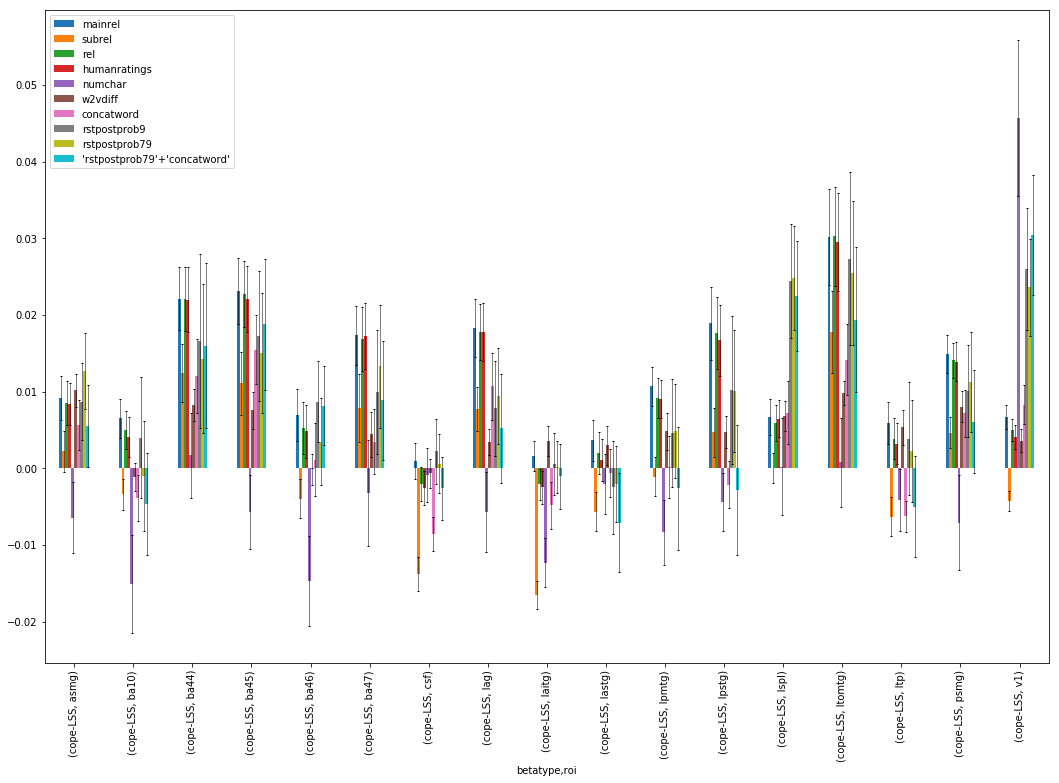

In [25]:
# DO NOT RUN
# cope Results
corrgp=corr_df.groupby(["betatype", "roi"])
ax = plot_results(corrgp)